### 參考lesson 5

##### 前置作業, 確認sql 連線正常

In [9]:
# 連線到 raspberry 
import psycopg2
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
cursor = conn.cursor()
cursor.execute(
'''
SELECT version();
'''
)
db_version = cursor.fetchall()
print(db_version)
cursor.close()
conn.close()


[('PostgreSQL 15.8 (Debian 15.8-0+deb12u1) on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]


In [10]:
import psycopg2
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')


In [11]:
conn

<connection object at 0x00000189B66A0BF0; dsn: 'user=a29 password=xxx dbname=mydatabase_a29 host=192.168.0.252', closed: 0>

In [12]:
type(conn)

psycopg2.extensions.connection

In [13]:
# 連線到 render 
import psycopg2
conn = psycopg2.connect(host='dpg-cs9su923esus739lqq3g-a.oregon-postgres.render.com',
                        database='remote_render',
                        user='remote_render_user',
                        password='u9ErznaZUhv1OcXi8JXkdCeapEHfceK1')
cursor = conn.cursor()
cursor.execute(
'''
SELECT version();'''
)
db_version = cursor.fetchall()
print(db_version)
cursor.close()
conn.close()


[('PostgreSQL 16.3 (Debian 16.3-1.pgdg120+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]


### 上課

## 建立資料表

In [23]:
# 連線到 raspberry 
import psycopg2

_sql = '''
CREATE TABLE IF NOT EXISTS 市場(
    name VARCHAR(20),
    country VARCHAR(20),
    PRIMARY KEY(name)
);
'''

conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
cursor = conn.cursor()
cursor.execute(_sql)
# return_info = cursor.fetchall()
# print(return_info)
conn.commit()
cursor.close()
connect.close()

In [24]:
# 連線到 raspberry 
import psycopg2

_sql = '''
CREATE TABLE IF NOT EXISTS 股市(
stock_id SERIAL,
date DATE,
open NUMERIC(17,10),
high NUMERIC(17,10),
low NUMERIC(17,10),
close NUMERIC(17,10),
adj_close NUMERIC(17,10),
volume BIGINT DEFAULT 0,
name VARCHAR(20),
PRIMARY KEY(stock_id),
FOREIGN KEY(name) REFERENCES 市場(name) 
ON DELETE NO ACTION
ON UPDATE CASCADE
);
'''

conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
cursor = conn.cursor()
cursor.execute(_sql)
# return_info = cursor.fetchall()
# print(return_info)
conn.commit()
cursor.close()
connect.close()

### 換種寫法 - with   *** 推薦 ***

In [25]:
SQL1 = '''
CREATE TABLE IF NOT EXISTS 市場(
	name VARCHAR(20),
	country VARCHAR(20),
	PRIMARY KEY(name),
	UNIQUE(name,country) /*資料不可以重複*/
);
'''
SQL2 = '''
CREATE TABLE IF NOT EXISTS 股市(
	stock_id SERIAL,
	date DATE,
	open NUMERIC(17,10),
	high NUMERIC(17,10),
	low NUMERIC(17,10),
	close NUMERIC(17,10),
	adj_close NUMERIC(17,10),
	volume BIGINT DEFAULT 0,
	name VARCHAR(20),
	PRIMARY KEY(stock_id),
	UNIQUE(date,name),/*資料不可以重複*/
	FOREIGN KEY(name) REFERENCES 市場(name) 
	ON DELETE NO ACTION
	ON UPDATE CASCADE
);
'''

# 連線到 raspberry 
import psycopg2
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
with conn:
    with conn.cursor() as cursor:
        cursor.execute(SQL1)
    with conn.cursor() as cursor:
        cursor.execute(SQL2)

connect.close()

### 開始嘗試插入資料

In [8]:
SQL1 = '''
INSERT INTO 市場 values(%s,%s)
ON CONFLICT DO NOTHING;
'''
SQL2 = '''
SELECT * 
FROM 市場;
'''

# 連線到 raspberry 
import psycopg2
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
with conn:
    with conn.cursor() as cursor:
        cursor.execute(SQL1,['^TWII','台灣'])  # // 注意, 這裡把餵進去的數值變成變數
    with conn.cursor() as cursor:
        cursor.execute(SQL1,['^HSI','香港恆生'])  # // 注意, 這裡把餵進去的數值變成變數
    with conn.cursor() as cursor:
        cursor.execute(SQL2)
        return_info = cursor.fetchall()
        print(return_info)

conn.close()

[('^TWII', '台灣'), ('^HSI', '香港恆生')]


### 拆解來源資料

In [1]:
import yfinance as yf
taiwan = yf.download('^TWII')

[*********************100%***********************]  1 of 1 completed


In [30]:
all_data = taiwan.to_dict(orient='index')
for key,value in all_data.items():
    print(key)

1997-07-02 00:00:00+00:00
1997-07-03 00:00:00+00:00
1997-07-04 00:00:00+00:00
1997-07-07 00:00:00+00:00
1997-07-08 00:00:00+00:00
1997-07-09 00:00:00+00:00
1997-07-10 00:00:00+00:00
1997-07-11 00:00:00+00:00
1997-07-14 00:00:00+00:00
1997-07-15 00:00:00+00:00
1997-07-16 00:00:00+00:00
1997-07-17 00:00:00+00:00
1997-07-18 00:00:00+00:00
1997-07-21 00:00:00+00:00
1997-07-22 00:00:00+00:00
1997-07-23 00:00:00+00:00
1997-07-24 00:00:00+00:00
1997-07-25 00:00:00+00:00
1997-07-28 00:00:00+00:00
1997-07-29 00:00:00+00:00
1997-07-30 00:00:00+00:00
1997-07-31 00:00:00+00:00
1997-08-01 00:00:00+00:00
1997-08-04 00:00:00+00:00
1997-08-05 00:00:00+00:00
1997-08-06 00:00:00+00:00
1997-08-07 00:00:00+00:00
1997-08-08 00:00:00+00:00
1997-08-11 00:00:00+00:00
1997-08-12 00:00:00+00:00
1997-08-13 00:00:00+00:00
1997-08-14 00:00:00+00:00
1997-08-15 00:00:00+00:00
1997-08-19 00:00:00+00:00
1997-08-20 00:00:00+00:00
1997-08-21 00:00:00+00:00
1997-08-22 00:00:00+00:00
1997-08-25 00:00:00+00:00
1997-08-26 0

In [31]:
all_data = taiwan.to_dict(orient='index')
# 差詢 date 方法 , 只要日期
# https://docs.python.org/zh-tw/3/library/datetime.html#date-objects
for key,value in all_data.items():
    print(key.date())

1997-07-02
1997-07-03
1997-07-04
1997-07-07
1997-07-08
1997-07-09
1997-07-10
1997-07-11
1997-07-14
1997-07-15
1997-07-16
1997-07-17
1997-07-18
1997-07-21
1997-07-22
1997-07-23
1997-07-24
1997-07-25
1997-07-28
1997-07-29
1997-07-30
1997-07-31
1997-08-01
1997-08-04
1997-08-05
1997-08-06
1997-08-07
1997-08-08
1997-08-11
1997-08-12
1997-08-13
1997-08-14
1997-08-15
1997-08-19
1997-08-20
1997-08-21
1997-08-22
1997-08-25
1997-08-26
1997-08-27
1997-08-28
1997-09-01
1997-09-02
1997-09-03
1997-09-04
1997-09-05
1997-09-08
1997-09-09
1997-09-10
1997-09-11
1997-09-12
1997-09-15
1997-09-17
1997-09-18
1997-09-19
1997-09-22
1997-09-23
1997-09-24
1997-09-25
1997-09-26
1997-09-30
1997-10-01
1997-10-02
1997-10-03
1997-10-06
1997-10-07
1997-10-08
1997-10-09
1997-10-13
1997-10-14
1997-10-15
1997-10-16
1997-10-17
1997-10-20
1997-10-21
1997-10-22
1997-10-23
1997-10-24
1997-10-27
1997-10-28
1997-10-29
1997-10-30
1997-11-03
1997-11-04
1997-11-05
1997-11-06
1997-11-07
1997-11-10
1997-11-11
1997-11-13
1997-11-14

In [32]:
all_data = taiwan.to_dict(orient='index')
# 差詢 date 方法 , 只要日期
# https://docs.python.org/zh-tw/3/library/datetime.html#date-objects
for key,value in all_data.items():
    print(value) # 此為 dict 格式

{('Adj Close', '^TWII'): 8996.6787109375, ('Close', '^TWII'): 8996.7197265625, ('High', '^TWII'): 9124.2998046875, ('Low', '^TWII'): 8988.1298828125, ('Open', '^TWII'): 9094.26953125, ('Volume', '^TWII'): 0}
{('Adj Close', '^TWII'): 9027.5888671875, ('Close', '^TWII'): 9027.6298828125, ('High', '^TWII'): 9061.599609375, ('Low', '^TWII'): 8997.509765625, ('Open', '^TWII'): 9061.599609375, ('Volume', '^TWII'): 0}
{('Adj Close', '^TWII'): 9192.5283203125, ('Close', '^TWII'): 9192.5703125, ('High', '^TWII'): 9218.2099609375, ('Low', '^TWII'): 9119.25, ('Open', '^TWII'): 9144.9599609375, ('Volume', '^TWII'): 0}
{('Adj Close', '^TWII'): 9322.7978515625, ('Close', '^TWII'): 9322.83984375, ('High', '^TWII'): 9370.41015625, ('Low', '^TWII'): 9304.8203125, ('Open', '^TWII'): 9365.1904296875, ('Volume', '^TWII'): 0}
{('Adj Close', '^TWII'): 9305.2275390625, ('Close', '^TWII'): 9305.26953125, ('High', '^TWII'): 9371.5, ('Low', '^TWII'): 9282.099609375, ('Open', '^TWII'): 9345.5498046875, ('Volume'

In [33]:
all_data = taiwan.to_dict(orient='index')
# 差詢 date 方法 , 只要日期
# https://docs.python.org/zh-tw/3/library/datetime.html#date-objects
for key,value in all_data.items():
    print(value[('Adj Close', '^TWII')]) # 此為 dict 格式 , 餵進去特定key
    # 順利取出所有的 Adj Close 數字

8996.6787109375
9027.5888671875
9192.5283203125
9322.7978515625
9305.2275390625
9362.6376953125
9429.6982421875
9394.587890625
9593.49609375
9555.9375
9544.5166015625
9571.755859375
9677.3564453125
9833.724609375
9550.357421875
9381.017578125
9632.3759765625
9808.865234375
9923.00390625
9892.294921875
9942.744140625
10066.302734375
10001.513671875
10065.712890625
9919.6337890625
9861.4248046875
9840.8349609375
9923.7939453125
9897.224609375
9807.6953125
9556.0771484375
9632.2958984375
9770.7548828125
9712.4052734375
9855.115234375
10025.0830078125
10020.5029296875
10011.423828125
10116.79296875
10050.623046875
9827.4453125
9504.947265625
9211.6279296875
9460.716796875
9147.8076171875
9290.34765625
9149.248046875
9079.318359375
9145.1376953125
9115.0576171875
9155.1982421875
8931.978515625
9087.5078125
9141.2880859375
9243.66796875
9220.9482421875
9073.7275390625
8993.978515625
8791.76953125
8718.9599609375
8708.7900390625
8694.9794921875
8504.6201171875
8537.1396484375
8392.5498046875


In [37]:
all_data = taiwan.to_dict(orient='index')
for key,value in all_data.items():
    _date = key.date()
    print(_date)
    
    name = '^TWII'
    _type_name = ['Adj Close','Open','High','Low','Close','Volume']
    for _type in _type_name:
        print(value[(_type, name)])
    print('---')


1997-07-02
8996.6787109375
9094.26953125
9124.2998046875
8988.1298828125
8996.7197265625
0
---
1997-07-03
9027.5888671875
9061.599609375
9061.599609375
8997.509765625
9027.6298828125
0
---
1997-07-04
9192.5283203125
9144.9599609375
9218.2099609375
9119.25
9192.5703125
0
---
1997-07-07
9322.7978515625
9365.1904296875
9370.41015625
9304.8203125
9322.83984375
0
---
1997-07-08
9305.2275390625
9345.5498046875
9371.5
9282.099609375
9305.26953125
0
---
1997-07-09
9362.6376953125
9391.2802734375
9415.580078125
9343.2998046875
9362.6796875
0
---
1997-07-10
9429.6982421875
9470.9296875
9511.7998046875
9420.7099609375
9429.740234375
0
---
1997-07-11
9394.587890625
9498.0703125
9526.740234375
9333.7900390625
9394.6298828125
0
---
1997-07-14
9593.49609375
9626.33984375
9626.33984375
9561.080078125
9593.5400390625
0
---
1997-07-15
9555.9375
9714.7802734375
9714.7802734375
9451.4501953125
9555.98046875
0
---
1997-07-16
9544.5166015625
9634.7900390625
9648.4296875
9482.4501953125
9544.5595703125
0
---

6777.74853515625
6701.35986328125
6801.5
6701.35986328125
6777.77978515625
6735400
---
2004-04-13
6794.298828125
6824.22998046875
6838.85986328125
6766.8701171875
6794.330078125
7997000
---
2004-04-14
6880.1484375
6772.419921875
6880.18017578125
6772.419921875
6880.18017578125
7510200
---
2004-04-15
6736.7587890625
6905.16015625
6916.31005859375
6736.7900390625
6736.7900390625
7625000
---
2004-04-16
6818.1689453125
6750.2900390625
6840.75
6729.16015625
6818.2001953125
7174600
---
2004-04-19
6779.14892578125
6852.4501953125
6870.7099609375
6767.169921875
6779.18017578125
6694000
---
2004-04-20
6799.93896484375
6837.56005859375
6856.97998046875
6790.56982421875
6799.97021484375
6104000
---
2004-04-21
6810.21875
6801.75
6844.740234375
6792.14990234375
6810.25
5734600
---
2004-04-22
6732.05859375
6867.8701171875
6912.08984375
6678.7001953125
6732.08984375
7592800
---
2004-04-23
6748.06884765625
6791.35986328125
6806.97998046875
6694.58984375
6748.10009765625
4996200
---
2004-04-26
6710.668

7719.08984375
3751200
---
2011-08-12
7636.98486328125
7825.7998046875
7853.52978515625
7637.02001953125
7637.02001953125
3474600
---
2011-08-15
7819.3544921875
7769.169921875
7819.39013671875
7748.4599609375
7819.39013671875
2220000
---
2011-08-16
7798.55419921875
7886.93017578125
7896.18994140625
7778.64990234375
7798.58984375
2422600
---
2011-08-17
7741.72412109375
7807.669921875
7821.990234375
7732.31982421875
7741.759765625
2395200
---
2011-08-18
7614.93505859375
7721.18994140625
7721.18994140625
7561.02001953125
7614.97021484375
2615600
---
2011-08-19
7342.92626953125
7414.35986328125
7429.9599609375
7316.830078125
7342.9599609375
2901400
---
2011-08-22
7312.55615234375
7348.7099609375
7468.740234375
7248.68994140625
7312.58984375
2848000
---
2011-08-23
7550.19482421875
7369.43017578125
7564.64013671875
7349.56982421875
7550.22998046875
2798400
---
2011-08-24
7502.89599609375
7592.509765625
7594.81005859375
7432.52001953125
7502.93017578125
2874400
---
2011-08-25
7410.8359375
7559

11004.490234375
10992.759765625
11046.6396484375
10988.7001953125
11004.490234375
1843600
---
2019-05-03
11096.2998046875
11037.990234375
11097.0
11018.8603515625
11096.2998046875
1868300
---
2019-05-06
10897.1201171875
11005.3603515625
11005.3603515625
10870.400390625
10897.1201171875
2240200
---
2019-05-07
10987.1396484375
10913.9501953125
11004.759765625
10913.9501953125
10987.1396484375
1781400
---
2019-05-08
10923.7099609375
10938.4697265625
10946.8203125
10867.0595703125
10923.7099609375
1846400
---
2019-05-09
10733.669921875
10910.4697265625
10910.4697265625
10732.9697265625
10733.669921875
2458000
---
2019-05-10
10712.990234375
10751.5498046875
10834.6904296875
10669.3896484375
10712.990234375
2139200
---
2019-05-13
10558.2900390625
10684.0400390625
10693.4404296875
10549.0595703125
10558.2900390625
2021900
---
2019-05-14
10519.25
10480.2099609375
10544.9697265625
10363.01953125
10519.25
2502400
---
2019-05-15
10560.7099609375
10535.240234375
10612.5
10535.240234375
10560.70996

## 組合 來源資料 + 存入sql

In [41]:
all_data = taiwan.to_dict(orient='index')
for key,value in all_data.items():
    _date = key.date()
    print(_date)
    
    name = '^TWII'
    _type_name = ['Adj Close','Open','High','Low','Close','Volume']
    for _type in _type_name:
        print(value[(_type, name)])
        print(type(value[(_type, name)]))
    print('---')

1997-07-02
8996.6787109375
<class 'float'>
9094.26953125
<class 'float'>
9124.2998046875
<class 'float'>
8988.1298828125
<class 'float'>
8996.7197265625
<class 'float'>
0
<class 'int'>
---
1997-07-03
9027.5888671875
<class 'float'>
9061.599609375
<class 'float'>
9061.599609375
<class 'float'>
8997.509765625
<class 'float'>
9027.6298828125
<class 'float'>
0
<class 'int'>
---
1997-07-04
9192.5283203125
<class 'float'>
9144.9599609375
<class 'float'>
9218.2099609375
<class 'float'>
9119.25
<class 'float'>
9192.5703125
<class 'float'>
0
<class 'int'>
---
1997-07-07
9322.7978515625
<class 'float'>
9365.1904296875
<class 'float'>
9370.41015625
<class 'float'>
9304.8203125
<class 'float'>
9322.83984375
<class 'float'>
0
<class 'int'>
---
1997-07-08
9305.2275390625
<class 'float'>
9345.5498046875
<class 'float'>
9371.5
<class 'float'>
9282.099609375
<class 'float'>
9305.26953125
<class 'float'>
0
<class 'int'>
---
1997-07-09
9362.6376953125
<class 'float'>
9391.2802734375
<class 'float'>
9415.

4470.70947265625
<class 'float'>
4507.83984375
<class 'float'>
4527.75
<class 'float'>
4451.0400390625
<class 'float'>
4470.72998046875
<class 'float'>
0
<class 'int'>
---
2001-08-07
4403.97998046875
<class 'float'>
4425.240234375
<class 'float'>
4426.02001953125
<class 'float'>
4367.5400390625
<class 'float'>
4404.0
<class 'float'>
0
<class 'int'>
---
2001-08-08
4514.07958984375
<class 'float'>
4413.1298828125
<class 'float'>
4515.41015625
<class 'float'>
4413.1298828125
<class 'float'>
4514.10009765625
<class 'float'>
0
<class 'int'>
---
2001-08-09
4448.49951171875
<class 'float'>
4469.919921875
<class 'float'>
4521.16015625
<class 'float'>
4445.14990234375
<class 'float'>
4448.52001953125
<class 'float'>
0
<class 'int'>
---
2001-08-10
4476.8896484375
<class 'float'>
4470.75
<class 'float'>
4491.4501953125
<class 'float'>
4394.08984375
<class 'float'>
4476.91015625
<class 'float'>
0
<class 'int'>
---
2001-08-13
4520.7392578125
<class 'float'>
4492.27978515625
<class 'float'>
4557.850

<class 'int'>
---
2006-02-03
6594.56982421875
<class 'float'>
6592.18994140625
<class 'float'>
6626.43017578125
<class 'float'>
6547.169921875
<class 'float'>
6594.60009765625
<class 'float'>
3590600
<class 'int'>
---
2006-02-06
6719.9287109375
<class 'float'>
6568.35009765625
<class 'float'>
6719.9599609375
<class 'float'>
6530.7998046875
<class 'float'>
6719.9599609375
<class 'float'>
3912000
<class 'int'>
---
2006-02-07
6720.048828125
<class 'float'>
6692.419921875
<class 'float'>
6747.43017578125
<class 'float'>
6681.52978515625
<class 'float'>
6720.080078125
<class 'float'>
4253800
<class 'int'>
---
2006-02-08
6624.0791015625
<class 'float'>
6712.8701171875
<class 'float'>
6715.18017578125
<class 'float'>
6623.22998046875
<class 'float'>
6624.10986328125
<class 'float'>
3086600
<class 'int'>
---
2006-02-09
6630.09912109375
<class 'float'>
6696.64990234375
<class 'float'>
6700.85986328125
<class 'float'>
6620.31982421875
<class 'float'>
6630.1298828125
<class 'float'>
3543800
<clas

<class 'int'>
---
2010-03-12
7748.29443359375
<class 'float'>
7773.52001953125
<class 'float'>
7773.52001953125
<class 'float'>
7726.08984375
<class 'float'>
7748.330078125
<class 'float'>
2575400
<class 'int'>
---
2010-03-15
7634.884765625
<class 'float'>
7750.8701171875
<class 'float'>
7766.35986328125
<class 'float'>
7634.919921875
<class 'float'>
7634.919921875
<class 'float'>
2705800
<class 'int'>
---
2010-03-16
7695.5947265625
<class 'float'>
7671.41015625
<class 'float'>
7695.81005859375
<class 'float'>
7645.169921875
<class 'float'>
7695.6298828125
<class 'float'>
2343400
<class 'int'>
---
2010-03-17
7847.8037109375
<class 'float'>
7763.43017578125
<class 'float'>
7849.3798828125
<class 'float'>
7762.85009765625
<class 'float'>
7847.83984375
<class 'float'>
3959000
<class 'int'>
---
2010-03-18
7886.302734375
<class 'float'>
7861.27001953125
<class 'float'>
7922.47998046875
<class 'float'>
7847.5498046875
<class 'float'>
7886.33984375
<class 'float'>
4674600
<class 'int'>
---
20

8597.2900390625
<class 'float'>
8638.58984375
<class 'float'>
8638.58984375
<class 'float'>
8580.400390625
<class 'float'>
8597.330078125
<class 'float'>
2381800
<class 'int'>
---
2014-03-21
8577.1298828125
<class 'float'>
8642.8203125
<class 'float'>
8642.8203125
<class 'float'>
8562.5703125
<class 'float'>
8577.169921875
<class 'float'>
2469800
<class 'int'>
---
2014-03-24
8605.33984375
<class 'float'>
8540.26953125
<class 'float'>
8605.3798828125
<class 'float'>
8508.009765625
<class 'float'>
8605.3798828125
<class 'float'>
1978400
<class 'int'>
---
2014-03-25
8689.259765625
<class 'float'>
8589.1904296875
<class 'float'>
8689.2998046875
<class 'float'>
8589.1904296875
<class 'float'>
8689.2998046875
<class 'float'>
2018100
<class 'int'>
---
2014-03-26
8737.2294921875
<class 'float'>
8741.0302734375
<class 'float'>
8746.7099609375
<class 'float'>
8717.7900390625
<class 'float'>
8737.26953125
<class 'float'>
2308500
<class 'int'>
---
2014-03-27
8779.5302734375
<class 'float'>
8737.55

<class 'float'>
9516.3203125
<class 'float'>
1787600
<class 'int'>
---
2018-10-30
9526.1103515625
<class 'float'>
9508.8095703125
<class 'float'>
9574.830078125
<class 'float'>
9481.66015625
<class 'float'>
9526.1103515625
<class 'float'>
1671600
<class 'int'>
---
2018-10-31
9802.1298828125
<class 'float'>
9588.8603515625
<class 'float'>
9802.1298828125
<class 'float'>
9588.8603515625
<class 'float'>
9802.1298828125
<class 'float'>
2211300
<class 'int'>
---
2018-11-01
9844.740234375
<class 'float'>
9812.2001953125
<class 'float'>
9869.58984375
<class 'float'>
9742.6103515625
<class 'float'>
9844.740234375
<class 'float'>
1992200
<class 'int'>
---
2018-11-02
9906.58984375
<class 'float'>
9871.400390625
<class 'float'>
9906.58984375
<class 'float'>
9817.2900390625
<class 'float'>
9906.58984375
<class 'float'>
2238700
<class 'int'>
---
2018-11-05
9889.8095703125
<class 'float'>
9856.849609375
<class 'float'>
9889.8095703125
<class 'float'>
9786.25
<class 'float'>
9889.8095703125
<class 'f

<class 'float'>
2647300
<class 'int'>
---
2023-02-06
15392.8203125
<class 'float'>
15514.7998046875
<class 'float'>
15514.7998046875
<class 'float'>
15392.8203125
<class 'float'>
15392.8203125
<class 'float'>
2320600
<class 'int'>
---
2023-02-07
15400.91015625
<class 'float'>
15376.1201171875
<class 'float'>
15462.099609375
<class 'float'>
15363.650390625
<class 'float'>
15400.91015625
<class 'float'>
2251800
<class 'int'>
---
2023-02-08
15618.169921875
<class 'float'>
15538.7099609375
<class 'float'>
15631.2197265625
<class 'float'>
15520.0498046875
<class 'float'>
15618.169921875
<class 'float'>
2514500
<class 'int'>
---
2023-02-09
15598.7099609375
<class 'float'>
15590.0
<class 'float'>
15617.33984375
<class 'float'>
15553.83984375
<class 'float'>
15598.7099609375
<class 'float'>
2236100
<class 'int'>
---
2023-02-10
15586.650390625
<class 'float'>
15627.330078125
<class 'float'>
15628.2998046875
<class 'float'>
15546.1103515625
<class 'float'>
15586.650390625
<class 'float'>
2483000

In [51]:
from decimal import Decimal
all_data = taiwan.to_dict(orient='index')
for key,value in all_data.items():
    _date = key.date()
    print(_date)
    
    name = '^TWII'
    _type_name_list = ['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']
    adj_close = Decimal(value[('Adj Close', name)])
    open      = Decimal(value[('Open', name)])
    high      = Decimal(value[('High', name)])
    low       = Decimal(value[('Low', name)])
    close     = Decimal(value[('Close', name)])
    volume    = Decimal(value[('Volume', name)])
    print(f'({adj_close},{open},{high},{low},{close},{volume})')
    print('---')

1997-07-02
(8996.6787109375,9094.26953125,9124.2998046875,8988.1298828125,8996.7197265625,0)
---
1997-07-03
(9027.5888671875,9061.599609375,9061.599609375,8997.509765625,9027.6298828125,0)
---
1997-07-04
(9192.5283203125,9144.9599609375,9218.2099609375,9119.25,9192.5703125,0)
---
1997-07-07
(9322.7978515625,9365.1904296875,9370.41015625,9304.8203125,9322.83984375,0)
---
1997-07-08
(9305.2275390625,9345.5498046875,9371.5,9282.099609375,9305.26953125,0)
---
1997-07-09
(9362.6376953125,9391.2802734375,9415.580078125,9343.2998046875,9362.6796875,0)
---
1997-07-10
(9429.6982421875,9470.9296875,9511.7998046875,9420.7099609375,9429.740234375,0)
---
1997-07-11
(9394.587890625,9498.0703125,9526.740234375,9333.7900390625,9394.6298828125,0)
---
1997-07-14
(9593.49609375,9626.33984375,9626.33984375,9561.080078125,9593.5400390625,0)
---
1997-07-15
(9555.9375,9714.7802734375,9714.7802734375,9451.4501953125,9555.98046875,0)
---
1997-07-16
(9544.5166015625,9634.7900390625,9648.4296875,9482.4501953125,

(6662.609375,6654.669921875,6696.93017578125,6646.2998046875,6662.64013671875,1770800)
---
2011-12-21
(6966.4482421875,6878.6298828125,6966.47998046875,6878.6298828125,6966.47998046875,2138600)
---
2011-12-22
(6966.318359375,6968.22021484375,6989.58984375,6940.85009765625,6966.35009765625,1957000)
---
2011-12-23
(7110.69775390625,7035.10009765625,7122.27978515625,7035.10009765625,7110.72998046875,2717400)
---
2011-12-26
(7092.5478515625,7125.0400390625,7125.669921875,7078.06005859375,7092.580078125,1730800)
---
2011-12-27
(7084.99755859375,7085.5,7107.669921875,7043.64013671875,7085.02978515625,1653800)
---
2011-12-28
(7056.63818359375,7086.10009765625,7093.47021484375,7036.919921875,7056.669921875,1799600)
---
2011-12-29
(7074.7880859375,7026.85986328125,7074.81982421875,6998.97021484375,7074.81982421875,1516200)
---
2011-12-30
(7072.04833984375,7109.85009765625,7139.02978515625,7054.7900390625,7072.080078125,1704800)
---
2012-01-03
(7053.34814453125,7005.39013671875,7073.7900390625,7

In [2]:
# 上課教的, 但是沒效率
from decimal import Decimal
all_data = taiwan.to_dict(orient='index')

    
    
# 連線到 raspberry 
import psycopg2
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
with conn:
    all_data = taiwan.to_dict(orient='index')
    with conn.cursor() as cursor:
        for key,value in all_data.items():
            date = key.date()
            name = '^TWII'
            adj_close = Decimal(value[('Adj Close', name)])
            open = Decimal(value[('Open', name)])
            high = Decimal(value[('High', name)])
            low = Decimal(value[('Low', name)])
            close = Decimal(value[('Close', name)])
            volume = Decimal(value[('Volume', name)])
            
            sql='''
            INSERT INTO 股市(date,open,high,low,close,adj_close,volume,name) 
            values(%s,%s,%s,%s,%s,%s,%s,%s);
            '''
            cursor.execute(sql,[date,open,high,low,close,adj_close,volume,name])
conn.close()

In [4]:
import yfinance as yf
%time taiwan = yf.download('^TWII')


[*********************100%***********************]  1 of 1 completed

CPU times: total: 15.6 ms
Wall time: 478 ms


In [6]:
%%time  #在jupyter 裡面監控運行時間
from decimal import Decimal
import yfinance as yf
import psycopg2
import time


# 從 yf (Yahoo Finance) 取得資料
taiwan = yf.download('^TWII')
%time all_data = taiwan.to_dict(orient='index')

# 把傳入的資料蒐集成 list, 再用  cursor.executemany(sql, insert_data)  一次大量傳入
# 來源資料 組合成list
insert_data = []
for key,value in all_data.items():
    date = key.date()
    name = '^TWII'
    adj_close  = Decimal(value[('Adj Close', name)])
    open_price = Decimal(value[('Open', name)])
    high       = Decimal(value[('High', name)])
    low        = Decimal(value[('Low', name)])
    close      = Decimal(value[('Close', name)])
    volume     = Decimal(value[('Volume', name)])
    # 組合資料
    insert_data.append((date, open_price, high, low, close, adj_close, volume, name))


# 連線到 sql @ raspberry , and 傳入 insert_data
conn = psycopg2.connect(host='192.168.0.252',
                        database='mydatabase_a29',
                        user='a29',
                        password='raspberry')
with conn:
    all_data = taiwan.to_dict(orient='index')
    with conn.cursor() as cursor:
        #conn.autocommit = False  # 关闭自动提交
        sql='''
        INSERT INTO 股市(date,open,high,low,close,adj_close,volume,name) 
        values(%s,%s,%s,%s,%s,%s,%s,%s)
        ON CONFLICT DO NOTHING; /*如果出錯, 不做任何事*/
        '''
        %time cursor.executemany(sql, insert_data)
        #conn.commit()  # 提交所有更改
conn.close()

[*********************100%***********************]  1 of 1 completed


CPU times: total: 453 ms
Wall time: 1min 18s
CPU times: total: 672 ms
Wall time: 1min 19s


当您运行一个包含 %%time 的单元格时，输出通常会包含以下信息：
CPU times:
user: 这是用户模式下 CPU 使用的时间，表示 CPU 执行用户代码所花费的时间。
sys: 这是内核模式下 CPU 使用的时间，表示操作系统内核为您的代码提供服务所花费的时间。
total: 这是用户时间和系统时间的总和，表示 CPU 总共花费在该代码上的时间。
Wall time:
这是从代码开始执行到完成所经过的实际时间（即“墙钟”时间）。这个值通常比 CPU 时间要长，因为它包括了程序等待 I/O 操作（如文件读写、网络请求等）或上下文切换等其他因素的时间

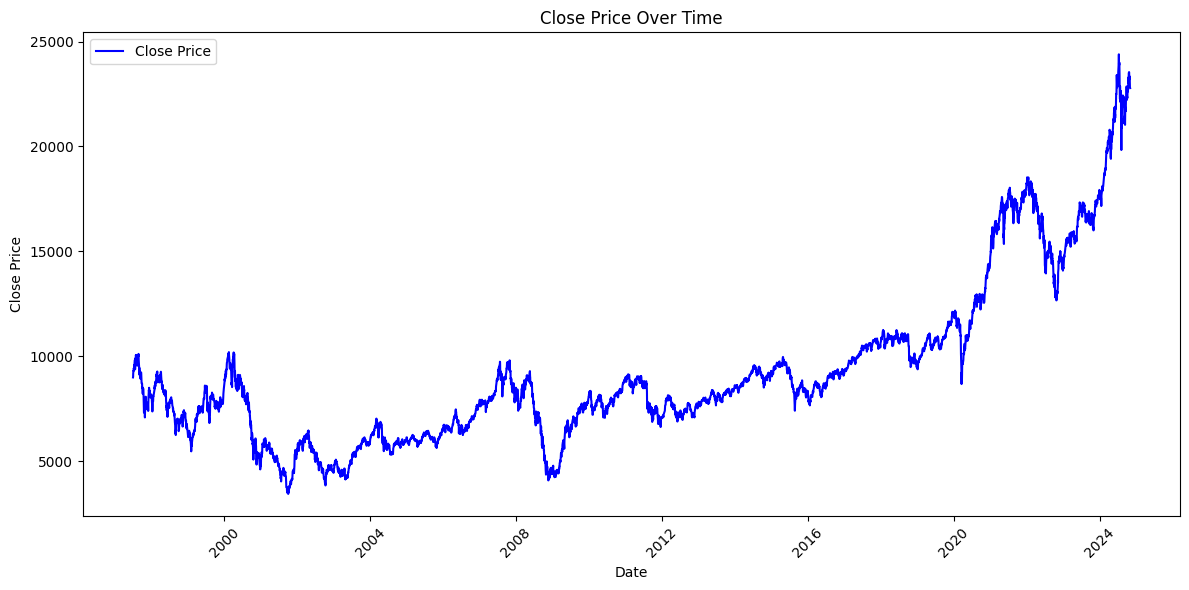

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 绘制 close 对应 date 的图表
dates = [record[0] for record in insert_data]
closes = [record[4] for record in insert_data]  # close 是第 4 个元素

plt.figure(figsize=(12, 6))
plt.plot(dates, closes, label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
%%time
from decimal import Decimal
import yfinance as yf
import psycopg2
import time
import datetime

from dotenv import load_dotenv, find_dotenv
import os
success = load_dotenv()

if success:
    print("成功載入 .env 檔案")
else:
    #load_dotenv(find_dotenv(f'.env.raspberry'))
    load_dotenv(find_dotenv(f'.env.render'))

#_FIN_NAM_ = '^HSI' #香港恆生
_FIN_NAM_ = '^TWII' #台灣加權

# 從 yf (Yahoo Finance) 取得資料
taiwan = yf.download(_FIN_NAM_)
%time all_data = taiwan.to_dict(orient='index')

# 把傳入的資料蒐集成 list, 再用  cursor.executemany(sql, insert_data)  一次大量傳入
# 來源資料 組合成list
insert_data = []
for key,value in all_data.items():
    date = key.date()
    name = _FIN_NAM_
    adj_close  = Decimal(value[('Adj Close', name)])
    open_price = Decimal(value[('Open', name)])
    high       = Decimal(value[('High', name)])
    low        = Decimal(value[('Low', name)])
    close      = Decimal(value[('Close', name)])
    volume     = Decimal(value[('Volume', name)])
    # 組合資料
    
    # if date > datetime.date(2023, 8, 31):
    #     insert_data.append((date, open_price, high, low, close, adj_close, volume, name))
    insert_data.append((date, open_price, high, low, close, adj_close, volume, name))

#print(insert_data)

# 連線到 sql @ raspberry , and 傳入 insert_data
conn = psycopg2.connect(host     = os.getenv('POSTGRE_HOST'),
                        database = os.getenv('POSTGRE_DATABASE'),
                        user     = os.getenv('POSTGRE_USER'),
                        password = os.getenv('POSTGRE_PASSWORD'))
with conn:
    all_data = taiwan.to_dict(orient='index')
    with conn.cursor() as cursor:
        conn.autocommit = False  # 关闭自动提交
        sql='''
        INSERT INTO 股市(date,open,high,low,close,adj_close,volume,name) 
        values(%s,%s,%s,%s,%s,%s,%s,%s)
        ON CONFLICT DO NOTHING; /*如果出錯, 不做任何事*/
        '''
        %time cursor.executemany(sql, insert_data)
        conn.commit()  # 提交所有更改
conn.close()





[*********************100%***********************]  1 of 1 completed


CPU times: total: 0 ns
Wall time: 19 ms
CPU times: total: 875 ms
Wall time: 16min 34s
CPU times: total: 906 ms
Wall time: 16min 35s


### 加入 env 隱藏敏感資料

In [33]:
# 連線到 raspberry 
import psycopg2
from dotenv import load_dotenv
import os
load_dotenv()

print(os.environ['POSTGRE_HOST'])
print(os.getenv('POSTGRE_HOST'))
'''
异常处理:
os.environ['POSTGRE_HOST']：如果环境变量 POSTGRE_HOST 不存在，会引发 KeyError 异常。
os.getenv('POSTGRE_HOST')：如果环境变量不存在，则返回 None，不会引发异常。
使用场景:
如果你希望在环境变量不存在时立即知道并处理错误，使用 os.environ 是合适的。
'''
#把敏感資料改成從 .env檔案 讀取
conn = psycopg2.connect(host     = os.getenv('POSTGRE_HOST'),
                        database = os.getenv('POSTGRE_DATABASE'),
                        user     = os.getenv('POSTGRE_USER'),
                        password = os.getenv('POSTGRE_PASSWORD'))

with conn:
    with conn.cursor() as cursor:
        SQL = '''
        SELECT version();
        '''
        cursor.execute(SQL)
        db_version = cursor.fetchall()
        print(db_version)

conn.close()

192.168.0.252
192.168.0.252
[('PostgreSQL 15.8 (Debian 15.8-0+deb12u1) on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]


In [36]:
# 連線到 raspberry 
import psycopg2
from dotenv import load_dotenv
import os
load_dotenv()

#把敏感資料改成從 .env檔案 讀取
conn = psycopg2.connect(host     = os.getenv('POSTGRE_HOST'),
                        database = os.getenv('POSTGRE_DATABASE'),
                        user     = os.getenv('POSTGRE_USER'),
                        password = os.getenv('POSTGRE_PASSWORD'))

SQL = '''
SELECT country,市場.name,date,adj_close,volume
FROM 股市 join 市場 on 股市.name=市場.name
WHERE country='台灣';
'''

with conn:
    with conn.cursor() as cursor:
        cursor.execute(SQL)
        all_data = cursor.fetchall()
conn.close()

print(len(all_data)) # 顯示筆數
print(all_data) # 顯示 row data

6703
[('台灣', '^TWII', datetime.date(1997, 7, 2), Decimal('8996.6787109375'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 3), Decimal('9027.5888671875'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 4), Decimal('9192.5283203125'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 7), Decimal('9322.7978515625'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 8), Decimal('9305.2275390625'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 9), Decimal('9362.6376953125'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 10), Decimal('9429.6982421875'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 11), Decimal('9394.5878906250'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 14), Decimal('9593.4960937500'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 15), Decimal('9555.9375000000'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 16), Decimal('9544.5166015625'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 17), Decimal('9571.7558593750'), 0), ('台灣', '^TWII', datetime.date(1997, 7, 18), Decimal('9677.3564453125'), 0), ('台灣', '^TWI